# This is a sample Jupyter Notebook


## Basic Info

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/raw/Corona_NLP_train.csv", encoding='latin1')

# Show basic info

print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (41157, 6)

Column names: ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

Missing values:
 UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


## Distributions

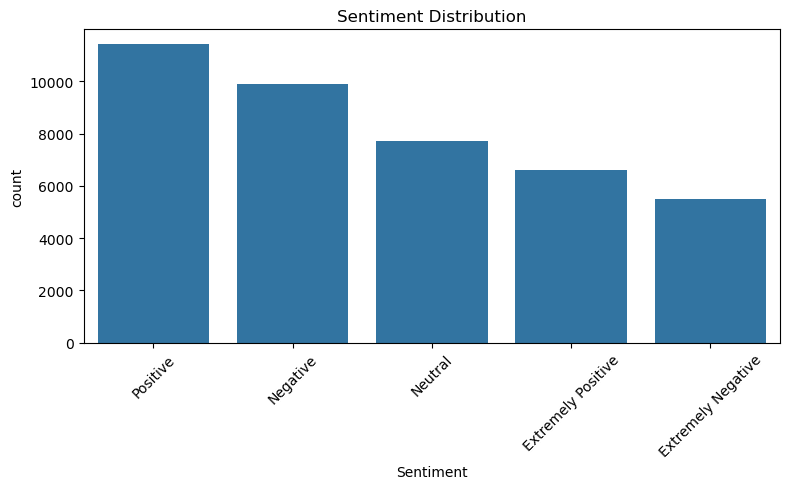

In [2]:

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


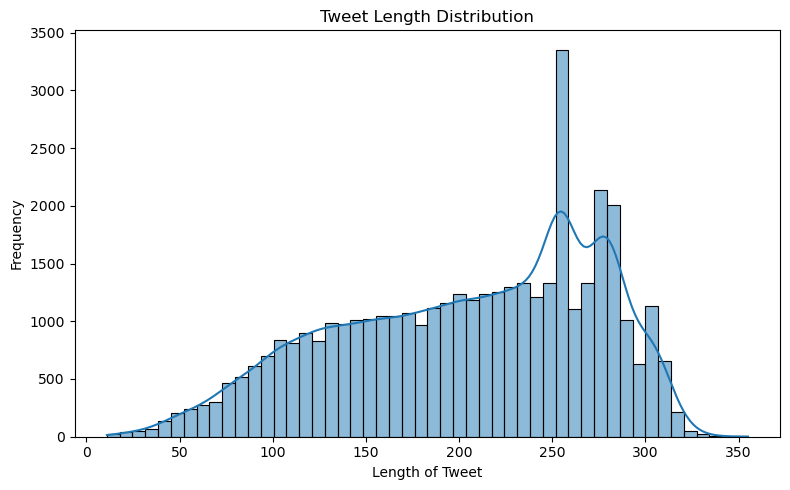

In [3]:
# Tweet length distribution
df['TweetLength'] = df['OriginalTweet'].astype(str).apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['TweetLength'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Examples

In [19]:
# Example of a tweet that has no text (only tags and urls)
example_bad_tweet = df[df["Sentiment"] == 'Neutral']["OriginalTweet"].iloc[0]
print(example_bad_tweet)

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8


In [29]:
# Example tweet per sentiment
print('Example tweet per:')
for sentiment in df["Sentiment"].unique():
    example = df[df["Sentiment"] == sentiment]["OriginalTweet"].iloc[1] 
    print(f"{sentiment:=^{60}}\n{example}\n{'='*60}\n")

Example tweet per:
==========================Neutral===========================
Was at the supermarket today. Didn't buy toilet paper. #Rebel

#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ

==========================Positive==========================
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P

=====================Extremely Negative=====================
with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale

==========================Negative==========================
@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the 

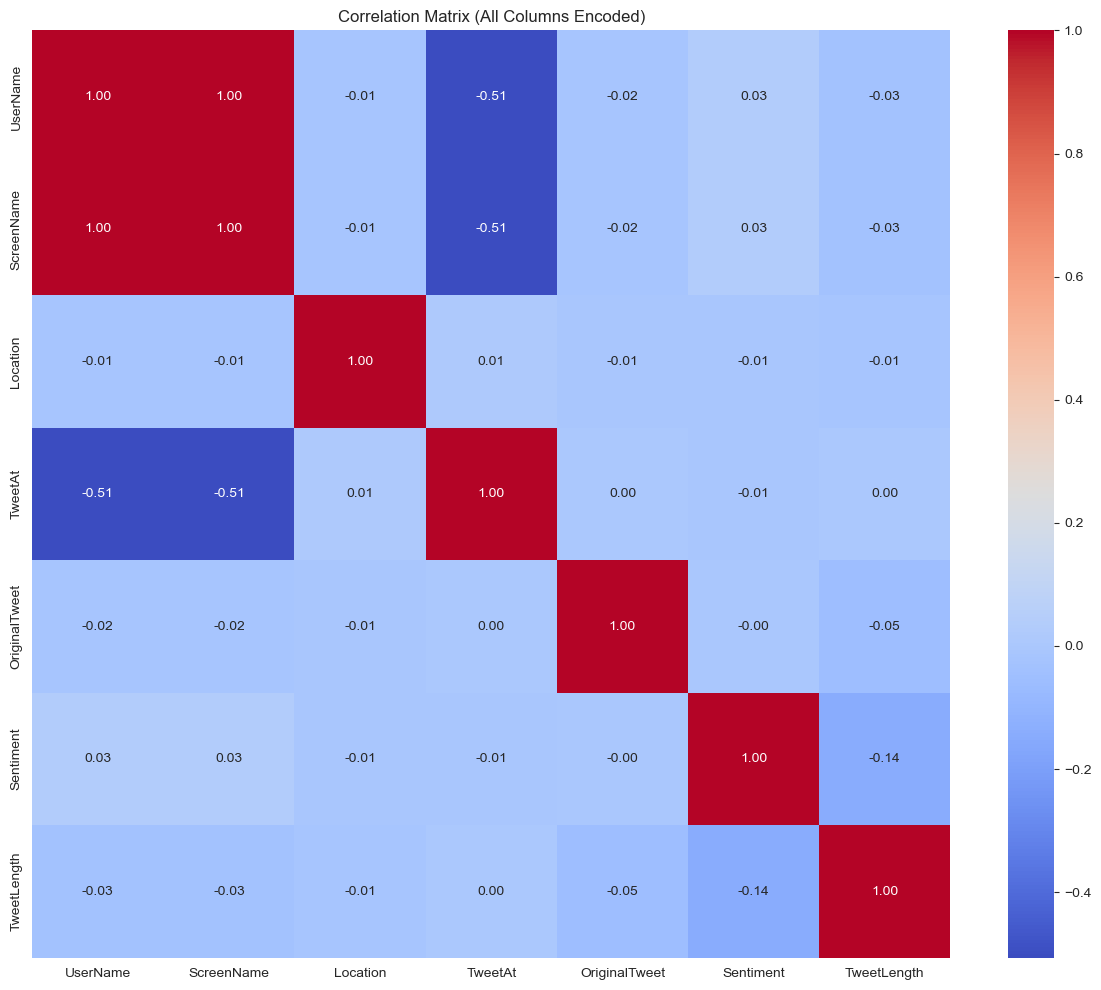

In [34]:
from sklearn.preprocessing import LabelEncoder
# Encode all categorical columns numerically
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le  # Save encoder if needed later

# Correlation matrix
corr_matrix = df_encoded.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Columns Encoded)")
plt.tight_layout()
plt.show()